# Final Assignment: Battle of the Neighborhoods (Week 5)

#### I will import the necessray libraries.

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import urllib
import urllib.request

#### Import NPU neighborhood data. 

In [2]:
df_npu = pd.read_excel('/Users/andressotelo/Documents/Coursera/NPU.xlsx')
print(df_npu.shape)
df_npu.head()

(242, 2)


,NPU,Neighborhood
0,A,Chastain Park
1,A,Kingswood
2,A,Margaret Mitchell
3,A,Mt. Paran Parkway
4,A,Mt. Paran/Northside


#### Import crime data. Each file is broken apart by month so I will concatenate all 12 files into a single data frame.

In [3]:
df_crime1 = pd.read_csv('/Users/andressotelo/Documents/Coursera/Jan.csv')
df_crime2 = pd.read_csv('/Users/andressotelo/Documents/Coursera/Feb.csv')
df_crime3 = pd.read_csv('/Users/andressotelo/Documents/Coursera/Mar.csv')
df_crime4 = pd.read_csv('/Users/andressotelo/Documents/Coursera/Apr.csv')
df_crime5 = pd.read_csv('/Users/andressotelo/Documents/Coursera/May.csv')
df_crime6 = pd.read_csv('/Users/andressotelo/Documents/Coursera/Jun.csv')
df_crime7 = pd.read_csv('/Users/andressotelo/Documents/Coursera/Jul.csv')
df_crime8 = pd.read_csv('/Users/andressotelo/Documents/Coursera/Aug.csv')
df_crime9 = pd.read_csv('/Users/andressotelo/Documents/Coursera/Sep.csv')
df_crime10 = pd.read_csv('/Users/andressotelo/Documents/Coursera/Oct.csv')
df_crime11 = pd.read_csv('/Users/andressotelo/Documents/Coursera/Nov.csv')
df_crime12 = pd.read_csv('/Users/andressotelo/Documents/Coursera/Dec.csv')
df_crime_list = [df_crime1, df_crime2, df_crime3, df_crime4, df_crime5, df_crime6, df_crime7, df_crime8, df_crime9,
                 df_crime10, df_crime11, df_crime12]
df_crime = pd.concat(df_crime_list, axis = 0, ignore_index = False)
print(df_crime.shape)
print(df_crime.head())

(24958, 10)
            UC2_Literal  Report Number Report Date  \
0   LARCENY-NON VEHICLE      190311809  01/31/2019   
1   LARCENY-NON VEHICLE      190312082  01/31/2019   
2  LARCENY-FROM VEHICLE      190310328  01/31/2019   
3  LARCENY-FROM VEHICLE      190310420  01/31/2019   
4  LARCENY-FROM VEHICLE      190310442  01/31/2019   

                         Location   Beat Neigborhood NPU       Lat      Long  \
0  190 MARIETTA ST NW @OMNI HOTEL  507.0    Downtown   M  33.75757 -84.39487   
1  190 MARIETTA ST NW @OMNI HOTEL  507.0    Downtown   M  33.75757 -84.39487   
2                1244 HOLLY ST NW  501.0   Home Park   E  33.78874 -84.39602   
3            3670 RIDGEWOOD RD NW  201.0       Paces   A  33.85498 -84.44081   
4     3537 MARTIN L KING JR DR NW  111.0  Adamsville   H  33.75819 -84.50327   

   Unnamed: 9  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


#### Clean up the data. I will remove the last column, remove rows containing missing information, rename columns and remove duplicate rows.

In [4]:
df_crime.drop(columns = ['Report Number', 'Location', 'Beat', 'Unnamed: 9'], inplace = True)
df_crime = df_crime.dropna()
df_crime = df_crime.rename(columns = {'UC2_Literal':'Crime'})
print(df_crime.shape)
print(df_crime.head())

(24039, 6)
                  Crime Report Date Neigborhood NPU       Lat      Long
0   LARCENY-NON VEHICLE  01/31/2019    Downtown   M  33.75757 -84.39487
1   LARCENY-NON VEHICLE  01/31/2019    Downtown   M  33.75757 -84.39487
2  LARCENY-FROM VEHICLE  01/31/2019   Home Park   E  33.78874 -84.39602
3  LARCENY-FROM VEHICLE  01/31/2019       Paces   A  33.85498 -84.44081
4  LARCENY-FROM VEHICLE  01/31/2019  Adamsville   H  33.75819 -84.50327


#### The following code is to build the neighborhood dataset. I will use the average coordinates of latitude and longitude in each given neighborhood and will remove duplicate rows.

In [5]:
df_coord = df_crime.groupby(['Neigborhood','NPU']).mean().reset_index()
duplicates = pd.concat(g for _, g in df_coord.groupby("Neigborhood") if len(g) > 1)
dup_list = duplicates['Neigborhood'].tolist()
dup_list = set(dup_list)
for neighborhood in dup_list:
    print(df_npu.loc[df_npu['Neighborhood'] == neighborhood])
neighborhoods = ['Marietta Street Artery', 'Atlanta University Center']
npu_correct = ['E', 'T']
for neighborhood, npu in zip(neighborhoods, npu_correct):
    i = df_coord[((df_coord.Neigborhood == neighborhood) &( df_coord.NPU != npu))].index
    df_coord = df_coord.drop(i)
df_coord.rename(index = str, columns={'Neigborhood':'Neighborhood'}, inplace = True)

df_coord = df_coord.reset_index()
df_coord.drop('index', axis=1, inplace = True)
print(df_coord.shape)
df_coord.head(10)

   NPU            Neighborhood
62   E  Marietta Street Artery
    NPU               Neighborhood
194   T  Atlanta University Center
(235, 4)


,Neighborhood,NPU,Lat,Long
0,Adair Park,V,33.730347,-84.410063
1,Adams Park,R,33.714388,-84.460742
2,Adamsville,H,33.759221,-84.503375
3,Almond Park,G,33.783793,-84.460715
4,Amal Heights,Y,33.708652,-84.398886
5,Ansley Park,E,33.792629,-84.378589
6,Arden/Habersham,C,33.839000,-84.397700
7,Ardmore,E,33.804349,-84.394116
8,Argonne Forest,C,33.840186,-84.405024
9,Arlington Estates,P,33.692197,-84.537636


#### Now that I know there are duplicates in the Neighborhood data, lets remove duplicate rows in the crime data. After we do all that work, as you can see below on the output, we will end up with our crime dataset that consists of 24,014 rows and 6 columns.

In [6]:
neighborhoods = ['Marietta Street Artery', 'Atlanta University Center']
npu_correct = ['E', 'T']
for neighborhood, npu in zip(neighborhoods, npu_correct):
    i = df_crime[((df_crime.Neigborhood == neighborhood) &( df_crime.NPU != npu))].index
    df_crime = df_crime.drop(i)
df_crime.rename(index = str, columns={'Neigborhood':'Neighborhood'}, inplace = True)

df_crime = df_crime.reset_index()
df_crime.drop('index', axis = 1, inplace = True)
print(df_crime.shape)
df_crime.head(10)

(24014, 6)


,Crime,Report Date,Neighborhood,NPU,Lat,Long
0,LARCENY-NON VEHICLE,01/31/2019,Downtown,M,33.75757,-84.39487
1,LARCENY-NON VEHICLE,01/31/2019,Downtown,M,33.75757,-84.39487
2,LARCENY-FROM VEHICLE,01/31/2019,Home Park,E,33.78874,-84.39602
3,LARCENY-FROM VEHICLE,01/31/2019,Paces,A,33.85498,-84.44081
4,LARCENY-FROM VEHICLE,01/31/2019,Adamsville,H,33.75819,-84.50327
5,LARCENY-FROM VEHICLE,01/31/2019,Edgewood,O,33.76103,-84.33185
6,LARCENY-FROM VEHICLE,01/31/2019,Morningside/Lenox Park,F,33.80646,-84.36665
7,LARCENY-FROM VEHICLE,01/31/2019,West End,T,33.74689,-84.42723
8,LARCENY-FROM VEHICLE,01/31/2019,Grant Park,W,33.74676,-84.37856
9,LARCENY-FROM VEHICLE,01/31/2019,Candler Park,N,33.76188,-84.34831


#### I will use my Foursquare credentials to get data for venues and import necessary libraries.

In [7]:
CLIENT_ID = 'MBABGYFKIQRBKDV0JZEJPVMSEUK51ZVY2JCYZ4DRRW5G0RI3' 
CLIENT_SECRET = 'ISGLBJOSTPZWAWEJYPOLKSSB3UZCQWHU0HRZ1D4TUHVIMVXE' 
VERSION = '20200424' 
LIMIT = 100

In [8]:
from geopy.geocoders import Nominatim
import folium
import json
import requests
from pandas.io.json import json_normalize

In [9]:
address = 'Atlanta, Georgia'
geolocator = Nominatim(user_agent="atlanta_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Atlanta are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Atlanta are 33.7490987, -84.3901849.


#### Define a function to get location data for each neighborhood. 

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:
atlanta_venues = getNearbyVenues(names=df_coord['Neighborhood'],
                                   latitudes=df_coord['Lat'],
                                   longitudes=df_coord['Long']
                                  )

Adair Park
Adams Park
Adamsville
Almond Park
Amal Heights
Ansley Park
Arden/Habersham
Ardmore
Argonne Forest
Arlington Estates
Ashley Courts
Ashview Heights
Atkins Park
Atlanta Industrial Park
Atlanta University Center
Atlantic Station
Audobon Forest
Audobon Forest West
Baker Hills
Bakers Ferry
Bankhead
Bankhead/Bolton
Beecher Hills
Ben Hill
Ben Hill Acres
Ben Hill Forest
Ben Hill Pines
Ben Hill Terrace
Benteen Park
Berkeley Park
Betmar LaVilla
Blair Villa/Poole Creek
Blandtown
Bolton
Bolton Hills
Boulder Park
Boulevard Heights
Brandon
Brentwood
Briar Glen
Brookhaven
Brookview Heights
Brookwood
Brookwood Hills
Browns Mill Park
Buckhead Forest
Buckhead Heights
Buckhead Village
Bush Mountain
Butner/Tell
Cabbagetown
Campbellton Road
Candler Park
Capitol Gateway
Capitol View
Capitol View Manor
Carey Park
Carroll Heights
Carver Hills
Cascade Avenue/Road
Cascade Green
Cascade Heights
Castleberry Hill
Castlewood
Center Hill
Chalet Woods
Channing Valley
Chastain Park
Chattahoochee
Chosewood Pa

#### This is our venues dataframe.

In [12]:
print(atlanta_venues.shape)
print(atlanta_venues.head())

(4927, 7)
  Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Adair Park              33.730347              -84.410063   
1   Adair Park              33.730347              -84.410063   
2   Adair Park              33.730347              -84.410063   
3   Adair Park              33.730347              -84.410063   
4   Adair Park              33.730347              -84.410063   

                                        Venue  Venue Latitude  \
0                              Adair Park One       33.730525   
1                         Monday Night Garage       33.729407   
2  Atlanta BeltLine Corridor under Lee/Murphy       33.727205   
3                                      Boxcar       33.730106   
4                    Urban Vines Wine Company       33.729072   

   Venue Longitude Venue Category  
0       -84.412837           Park  
1       -84.418303        Brewery  
2       -84.417238          Trail  
3       -84.418582      Gastropub  
4       -84.412881       Win

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

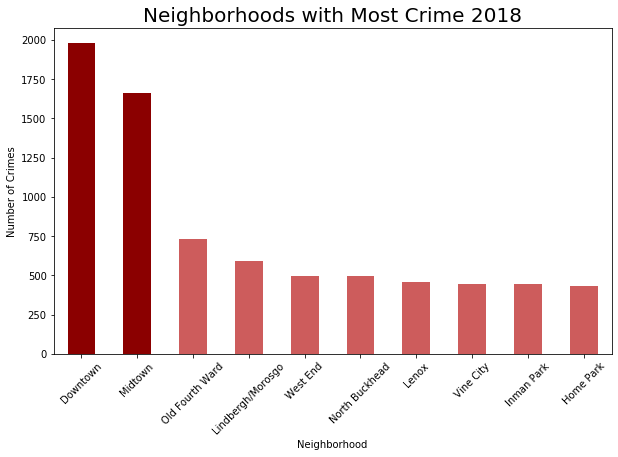

In [14]:
hood_crime = df_crime['Neighborhood'].value_counts()
hood_crime10 = hood_crime[0:10]

top_10 = hood_crime10.plot(kind='bar', color = 'indianred',figsize=(10, 6))
top_10.patches[hood_crime10.index.get_indexer(['Downtown'])[0]].set_facecolor('darkred')
top_10.patches[hood_crime10.index.get_indexer(['Midtown'])[0]].set_facecolor('darkred')

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Number of Crimes') # add y-label to the plot
plt.title('Neighborhoods with Most Crime 2018', fontsize = 20)
plt.xticks(rotation=45)

plt.show()

In [15]:
# one hot encoding
atl_onehot = pd.get_dummies(df_crime[['Crime']], prefix = "", prefix_sep = "")

# add neighborhood column back to dataframe
atl_onehot['Neighborhood'] = df_crime['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [atl_onehot.columns[-1]] + list(atl_onehot.columns[:-1])
atl_onehot = atl_onehot[fixed_columns]

atl_onehot.head()

,Neighborhood,AGG ASSAULT,AUTO THEFT,BURGLARY-NONRES,BURGLARY-RESIDENCE,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,MANSLAUGHTER,ROBBERY-COMMERCIAL,ROBBERY-PEDESTRIAN,ROBBERY-RESIDENCE
0,Downtown,0,0,0,0,0,0,1,0,0,0,0
1,Downtown,0,0,0,0,0,0,1,0,0,0,0
2,Home Park,0,0,0,0,0,1,0,0,0,0,0
3,Paces,0,0,0,0,0,1,0,0,0,0,0
4,Adamsville,0,0,0,0,0,1,0,0,0,0,0


In [16]:
num_crimes = pd.DataFrame(atl_onehot['Neighborhood'].value_counts()).reset_index()
num_crimes.rename(columns={'Neighborhood':'Count','index':'Neighborhood'}, inplace=True)
print('The top 10 neighborhoods with highest number of crimes:')
num_crimes.head(10)

The top 10 neighborhoods with highest number of crimes:


,Neighborhood,Count
0,Downtown,1979
1,Midtown,1664
2,Old Fourth Ward,732
3,Lindbergh/Morosgo,591
4,West End,496
5,North Buckhead,493
6,Lenox,458
7,Vine City,445
8,Inman Park,442
9,Home Park,434


In [17]:
# group by mean frequency

df_crime_grouped = atl_onehot.groupby('Neighborhood').mean().reset_index()
df_crime_grouped.head(10)

,Neighborhood,AGG ASSAULT,AUTO THEFT,BURGLARY-NONRES,BURGLARY-RESIDENCE,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,MANSLAUGHTER,ROBBERY-COMMERCIAL,ROBBERY-PEDESTRIAN,ROBBERY-RESIDENCE
0,Adair Park,0.089820,0.173653,0.035928,0.047904,0.011976,0.323353,0.293413,0.0,0.011976,0.005988,0.005988
1,Adams Park,0.157895,0.092105,0.144737,0.105263,0.013158,0.197368,0.223684,0.0,0.013158,0.052632,0.000000
2,Adamsville,0.105072,0.137681,0.036232,0.043478,0.014493,0.246377,0.318841,0.0,0.007246,0.079710,0.010870
3,Almond Park,0.256410,0.051282,0.000000,0.179487,0.025641,0.179487,0.179487,0.0,0.000000,0.128205,0.000000
4,Amal Heights,0.384615,0.076923,0.000000,0.000000,0.000000,0.538462,0.000000,0.0,0.000000,0.000000,0.000000
5,Ansley Park,0.047619,0.166667,0.000000,0.023810,0.000000,0.523810,0.166667,0.0,0.000000,0.071429,0.000000
6,Arden/Habersham,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
7,Ardmore,0.035714,0.107143,0.053571,0.000000,0.000000,0.732143,0.071429,0.0,0.000000,0.000000,0.000000
8,Argonne Forest,0.000000,0.000000,0.000000,0.200000,0.000000,0.400000,0.200000,0.0,0.000000,0.200000,0.000000
9,Arlington Estates,0.315789,0.157895,0.000000,0.105263,0.000000,0.263158,0.105263,0.0,0.000000,0.052632,0.000000


In [18]:
def return_most_common_crimes(row, num_top_crimes):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_crimes]

In [19]:
num_top_crimes = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_crimes):
    try:
        columns.append('{}{} Most Common Crime'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Crime'.format(ind+1))

# create a new dataframe
atl_crime_sorted1 = pd.DataFrame(columns=columns)
atl_crime_sorted1['Neighborhood'] = df_crime_grouped['Neighborhood']

for ind in np.arange(df_crime_grouped.shape[0]):
    atl_crime_sorted1.iloc[ind, 1:] = return_most_common_crimes(df_crime_grouped.iloc[ind, :], num_top_crimes)

atl_crime_sorted1.head(10)

,Neighborhood,1st Most Common Crime,2nd Most Common Crime,3rd Most Common Crime,4th Most Common Crime,5th Most Common Crime,6th Most Common Crime,7th Most Common Crime,8th Most Common Crime,9th Most Common Crime,10th Most Common Crime
0,Adair Park,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,AUTO THEFT,AGG ASSAULT,BURGLARY-RESIDENCE,BURGLARY-NONRES,ROBBERY-COMMERCIAL,HOMICIDE,ROBBERY-RESIDENCE,ROBBERY-PEDESTRIAN
1,Adams Park,LARCENY-NON VEHICLE,LARCENY-FROM VEHICLE,AGG ASSAULT,BURGLARY-NONRES,BURGLARY-RESIDENCE,AUTO THEFT,ROBBERY-PEDESTRIAN,ROBBERY-COMMERCIAL,HOMICIDE,ROBBERY-RESIDENCE
2,Adamsville,LARCENY-NON VEHICLE,LARCENY-FROM VEHICLE,AUTO THEFT,AGG ASSAULT,ROBBERY-PEDESTRIAN,BURGLARY-RESIDENCE,BURGLARY-NONRES,HOMICIDE,ROBBERY-RESIDENCE,ROBBERY-COMMERCIAL
3,Almond Park,AGG ASSAULT,LARCENY-NON VEHICLE,LARCENY-FROM VEHICLE,BURGLARY-RESIDENCE,ROBBERY-PEDESTRIAN,AUTO THEFT,HOMICIDE,ROBBERY-RESIDENCE,ROBBERY-COMMERCIAL,MANSLAUGHTER
4,Amal Heights,LARCENY-FROM VEHICLE,AGG ASSAULT,AUTO THEFT,ROBBERY-RESIDENCE,ROBBERY-PEDESTRIAN,ROBBERY-COMMERCIAL,MANSLAUGHTER,LARCENY-NON VEHICLE,HOMICIDE,BURGLARY-RESIDENCE
5,Ansley Park,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,AUTO THEFT,ROBBERY-PEDESTRIAN,AGG ASSAULT,BURGLARY-RESIDENCE,ROBBERY-RESIDENCE,ROBBERY-COMMERCIAL,MANSLAUGHTER,HOMICIDE
6,Arden/Habersham,AGG ASSAULT,ROBBERY-RESIDENCE,ROBBERY-PEDESTRIAN,ROBBERY-COMMERCIAL,MANSLAUGHTER,LARCENY-NON VEHICLE,LARCENY-FROM VEHICLE,HOMICIDE,BURGLARY-RESIDENCE,BURGLARY-NONRES
7,Ardmore,LARCENY-FROM VEHICLE,AUTO THEFT,LARCENY-NON VEHICLE,BURGLARY-NONRES,AGG ASSAULT,ROBBERY-RESIDENCE,ROBBERY-PEDESTRIAN,ROBBERY-COMMERCIAL,MANSLAUGHTER,HOMICIDE
8,Argonne Forest,LARCENY-FROM VEHICLE,ROBBERY-PEDESTRIAN,LARCENY-NON VEHICLE,BURGLARY-RESIDENCE,ROBBERY-RESIDENCE,ROBBERY-COMMERCIAL,MANSLAUGHTER,HOMICIDE,BURGLARY-NONRES,AUTO THEFT
9,Arlington Estates,AGG ASSAULT,LARCENY-FROM VEHICLE,AUTO THEFT,LARCENY-NON VEHICLE,BURGLARY-RESIDENCE,ROBBERY-PEDESTRIAN,ROBBERY-RESIDENCE,ROBBERY-COMMERCIAL,MANSLAUGHTER,HOMICIDE


#### Now, we are going to cluster neighborhoods by crime using K-Means clustering.

In [20]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

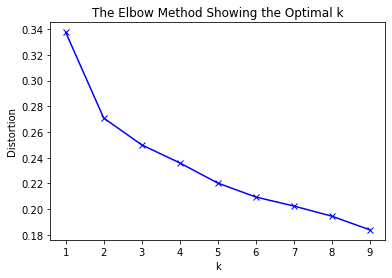

Our optimal k is k = 2.


In [21]:
df_grouped_clustering = df_crime_grouped.drop('Neighborhood', 1)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=4).fit(df_grouped_clustering)
    kmeanModel.fit(df_grouped_clustering)
    distortions.append(sum(np.min(cdist(df_grouped_clustering,\
                                        kmeanModel.cluster_centers_, 'euclidean'),\
                                        axis=1)) / df_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing the Optimal k')
plt.show()

print('Our optimal k is k = 2.')

#### Now, we are going to cluster neighborhoods.

In [22]:
# set number of clusters
kclusters = 2

df_grouped_clustering = df_crime_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(df_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int32)

In [23]:
# add clustering labels
atl_crime_sorted1.insert(0, 'Cluster Labels', kmeans.labels_)

df_merged = df_coord

# merge atl_grouped with toronto_data to add latitude/longitude for each neighborhood
df_merged = df_merged.join(atl_crime_sorted1.set_index('Neighborhood'), on='Neighborhood')

df_merged.head()

,Neighborhood,NPU,Lat,Long,Cluster Labels,1st Most Common Crime,2nd Most Common Crime,3rd Most Common Crime,4th Most Common Crime,5th Most Common Crime,6th Most Common Crime,7th Most Common Crime,8th Most Common Crime,9th Most Common Crime,10th Most Common Crime
0,Adair Park,V,33.730347,-84.410063,0,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,AUTO THEFT,AGG ASSAULT,BURGLARY-RESIDENCE,BURGLARY-NONRES,ROBBERY-COMMERCIAL,HOMICIDE,ROBBERY-RESIDENCE,ROBBERY-PEDESTRIAN
1,Adams Park,R,33.714388,-84.460742,0,LARCENY-NON VEHICLE,LARCENY-FROM VEHICLE,AGG ASSAULT,BURGLARY-NONRES,BURGLARY-RESIDENCE,AUTO THEFT,ROBBERY-PEDESTRIAN,ROBBERY-COMMERCIAL,HOMICIDE,ROBBERY-RESIDENCE
2,Adamsville,H,33.759221,-84.503375,0,LARCENY-NON VEHICLE,LARCENY-FROM VEHICLE,AUTO THEFT,AGG ASSAULT,ROBBERY-PEDESTRIAN,BURGLARY-RESIDENCE,BURGLARY-NONRES,HOMICIDE,ROBBERY-RESIDENCE,ROBBERY-COMMERCIAL
3,Almond Park,G,33.783793,-84.460715,0,AGG ASSAULT,LARCENY-NON VEHICLE,LARCENY-FROM VEHICLE,BURGLARY-RESIDENCE,ROBBERY-PEDESTRIAN,AUTO THEFT,HOMICIDE,ROBBERY-RESIDENCE,ROBBERY-COMMERCIAL,MANSLAUGHTER
4,Amal Heights,Y,33.708652,-84.398886,1,LARCENY-FROM VEHICLE,AGG ASSAULT,AUTO THEFT,ROBBERY-RESIDENCE,ROBBERY-PEDESTRIAN,ROBBERY-COMMERCIAL,MANSLAUGHTER,LARCENY-NON VEHICLE,HOMICIDE,BURGLARY-RESIDENCE


In [24]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [25]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Lat'], df_merged['Long'], df_merged['Neighborhood'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [26]:
# Examine each cluster

clus1 = df_merged.loc[df_merged['Cluster Labels'] == 0, df_merged.columns[[0] + list(range(5, df_merged.shape[1]))]]
clus1.head()

,Neighborhood,1st Most Common Crime,2nd Most Common Crime,3rd Most Common Crime,4th Most Common Crime,5th Most Common Crime,6th Most Common Crime,7th Most Common Crime,8th Most Common Crime,9th Most Common Crime,10th Most Common Crime
0,Adair Park,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,AUTO THEFT,AGG ASSAULT,BURGLARY-RESIDENCE,BURGLARY-NONRES,ROBBERY-COMMERCIAL,HOMICIDE,ROBBERY-RESIDENCE,ROBBERY-PEDESTRIAN
1,Adams Park,LARCENY-NON VEHICLE,LARCENY-FROM VEHICLE,AGG ASSAULT,BURGLARY-NONRES,BURGLARY-RESIDENCE,AUTO THEFT,ROBBERY-PEDESTRIAN,ROBBERY-COMMERCIAL,HOMICIDE,ROBBERY-RESIDENCE
2,Adamsville,LARCENY-NON VEHICLE,LARCENY-FROM VEHICLE,AUTO THEFT,AGG ASSAULT,ROBBERY-PEDESTRIAN,BURGLARY-RESIDENCE,BURGLARY-NONRES,HOMICIDE,ROBBERY-RESIDENCE,ROBBERY-COMMERCIAL
3,Almond Park,AGG ASSAULT,LARCENY-NON VEHICLE,LARCENY-FROM VEHICLE,BURGLARY-RESIDENCE,ROBBERY-PEDESTRIAN,AUTO THEFT,HOMICIDE,ROBBERY-RESIDENCE,ROBBERY-COMMERCIAL,MANSLAUGHTER
6,Arden/Habersham,AGG ASSAULT,ROBBERY-RESIDENCE,ROBBERY-PEDESTRIAN,ROBBERY-COMMERCIAL,MANSLAUGHTER,LARCENY-NON VEHICLE,LARCENY-FROM VEHICLE,HOMICIDE,BURGLARY-RESIDENCE,BURGLARY-NONRES


In [27]:
clus2 = df_merged.loc[df_merged['Cluster Labels'] == 1, df_merged.columns[[0] + list(range(5, df_merged.shape[1]))]]
clus2.head()

,Neighborhood,1st Most Common Crime,2nd Most Common Crime,3rd Most Common Crime,4th Most Common Crime,5th Most Common Crime,6th Most Common Crime,7th Most Common Crime,8th Most Common Crime,9th Most Common Crime,10th Most Common Crime
4,Amal Heights,LARCENY-FROM VEHICLE,AGG ASSAULT,AUTO THEFT,ROBBERY-RESIDENCE,ROBBERY-PEDESTRIAN,ROBBERY-COMMERCIAL,MANSLAUGHTER,LARCENY-NON VEHICLE,HOMICIDE,BURGLARY-RESIDENCE
5,Ansley Park,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,AUTO THEFT,ROBBERY-PEDESTRIAN,AGG ASSAULT,BURGLARY-RESIDENCE,ROBBERY-RESIDENCE,ROBBERY-COMMERCIAL,MANSLAUGHTER,HOMICIDE
7,Ardmore,LARCENY-FROM VEHICLE,AUTO THEFT,LARCENY-NON VEHICLE,BURGLARY-NONRES,AGG ASSAULT,ROBBERY-RESIDENCE,ROBBERY-PEDESTRIAN,ROBBERY-COMMERCIAL,MANSLAUGHTER,HOMICIDE
8,Argonne Forest,LARCENY-FROM VEHICLE,ROBBERY-PEDESTRIAN,LARCENY-NON VEHICLE,BURGLARY-RESIDENCE,ROBBERY-RESIDENCE,ROBBERY-COMMERCIAL,MANSLAUGHTER,HOMICIDE,BURGLARY-NONRES,AUTO THEFT
12,Atkins Park,LARCENY-FROM VEHICLE,AUTO THEFT,LARCENY-NON VEHICLE,BURGLARY-RESIDENCE,ROBBERY-RESIDENCE,ROBBERY-PEDESTRIAN,ROBBERY-COMMERCIAL,MANSLAUGHTER,HOMICIDE,BURGLARY-NONRES


In [28]:
pdf = df_crime_grouped
pdf['Lat'] = df_merged['Lat']
pdf['Long'] = df_merged['Long']
#pdf.drop(['Clus_Db'], axis=1, inplace=True)
print(pdf.shape)
pdf.head(10)

(235, 14)


,Neighborhood,AGG ASSAULT,AUTO THEFT,BURGLARY-NONRES,BURGLARY-RESIDENCE,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,MANSLAUGHTER,ROBBERY-COMMERCIAL,ROBBERY-PEDESTRIAN,ROBBERY-RESIDENCE,Lat,Long
0,Adair Park,0.089820,0.173653,0.035928,0.047904,0.011976,0.323353,0.293413,0.0,0.011976,0.005988,0.005988,33.730347,-84.410063
1,Adams Park,0.157895,0.092105,0.144737,0.105263,0.013158,0.197368,0.223684,0.0,0.013158,0.052632,0.000000,33.714388,-84.460742
2,Adamsville,0.105072,0.137681,0.036232,0.043478,0.014493,0.246377,0.318841,0.0,0.007246,0.079710,0.010870,33.759221,-84.503375
3,Almond Park,0.256410,0.051282,0.000000,0.179487,0.025641,0.179487,0.179487,0.0,0.000000,0.128205,0.000000,33.783793,-84.460715
4,Amal Heights,0.384615,0.076923,0.000000,0.000000,0.000000,0.538462,0.000000,0.0,0.000000,0.000000,0.000000,33.708652,-84.398886
5,Ansley Park,0.047619,0.166667,0.000000,0.023810,0.000000,0.523810,0.166667,0.0,0.000000,0.071429,0.000000,33.792629,-84.378589
6,Arden/Habersham,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,33.839000,-84.397700
7,Ardmore,0.035714,0.107143,0.053571,0.000000,0.000000,0.732143,0.071429,0.0,0.000000,0.000000,0.000000,33.804349,-84.394116
8,Argonne Forest,0.000000,0.000000,0.000000,0.200000,0.000000,0.400000,0.200000,0.0,0.000000,0.200000,0.000000,33.840186,-84.405024
9,Arlington Estates,0.315789,0.157895,0.000000,0.105263,0.000000,0.263158,0.105263,0.0,0.000000,0.052632,0.000000,33.692197,-84.537636


In [29]:
!conda install -c conda-forge basemap-data-hires --y

Solving environment: done

# All requested packages already installed.



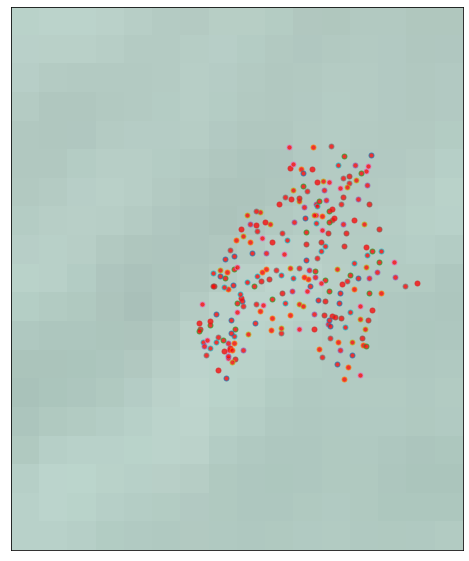

In [32]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=-84.75
ulon=-84.25
llat=33.5
ulat=34

pdf_location = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc', lat_0 = latitude, lon_0 = longitude,
                 resolution = 'l', area_thresh = 0.1,
                 llcrnrlon=-84.75, llcrnrlat=33.5,
                 urcrnrlon=-84.25, urcrnrlat=34)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf_location['xm']= xs.tolist()
pdf_location['ym'] =ys.tolist()

#Visualization1
for index,row in pdf_location.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()

In [33]:
# Clustering neighborhoods based on location.

from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf_location[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.35, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf_loc = pdf
pdf_loc["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
#pdf[["Neighborhood","Tx","Tm","Clus_Db"]].head(5)
pdf_loc.head(5)

,Neighborhood,AGG ASSAULT,AUTO THEFT,BURGLARY-NONRES,BURGLARY-RESIDENCE,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,MANSLAUGHTER,ROBBERY-COMMERCIAL,ROBBERY-PEDESTRIAN,ROBBERY-RESIDENCE,Lat,Long,Clus_Db
0,Adair Park,0.089820,0.173653,0.035928,0.047904,0.011976,0.323353,0.293413,0.0,0.011976,0.005988,0.005988,33.730347,-84.410063,1
1,Adams Park,0.157895,0.092105,0.144737,0.105263,0.013158,0.197368,0.223684,0.0,0.013158,0.052632,0.000000,33.714388,-84.460742,-1
2,Adamsville,0.105072,0.137681,0.036232,0.043478,0.014493,0.246377,0.318841,0.0,0.007246,0.079710,0.010870,33.759221,-84.503375,0
3,Almond Park,0.256410,0.051282,0.000000,0.179487,0.025641,0.179487,0.179487,0.0,0.000000,0.128205,0.000000,33.783793,-84.460715,4
4,Amal Heights,0.384615,0.076923,0.000000,0.000000,0.000000,0.538462,0.000000,0.0,0.000000,0.000000,0.000000,33.708652,-84.398886,1


In [34]:
set(labels)
pdf_loc['Clus_Db'].value_counts()
pdf_location2 = pdf_location
pdf_location2['Clus_Db']=pdf_loc['Clus_Db']
pdf_location2.head()

,Neighborhood,AGG ASSAULT,AUTO THEFT,BURGLARY-NONRES,BURGLARY-RESIDENCE,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,MANSLAUGHTER,ROBBERY-COMMERCIAL,ROBBERY-PEDESTRIAN,ROBBERY-RESIDENCE,Lat,Long,xm,ym,Clus_Db
0,Adair Park,0.089820,0.173653,0.035928,0.047904,0.011976,0.323353,0.293413,0.0,0.011976,0.005988,0.005988,33.730347,-84.410063,37799.292596,30756.738273,1
1,Adams Park,0.157895,0.092105,0.144737,0.105263,0.013158,0.197368,0.223684,0.0,0.013158,0.052632,0.000000,33.714388,-84.460742,32163.995241,28623.174719,-1
2,Adamsville,0.105072,0.137681,0.036232,0.043478,0.014493,0.246377,0.318841,0.0,0.007246,0.079710,0.010870,33.759221,-84.503375,27423.476158,34617.956266,0
3,Almond Park,0.256410,0.051282,0.000000,0.179487,0.025641,0.179487,0.179487,0.0,0.000000,0.128205,0.000000,33.783793,-84.460715,32166.994952,37904.870592,4
4,Amal Heights,0.384615,0.076923,0.000000,0.000000,0.000000,0.538462,0.000000,0.0,0.000000,0.000000,0.000000,33.708652,-84.398886,39042.059983,27856.481691,1


#### Visualizing clusters based on location.

Cluster 0, Avg Number of Crimes per Neighborhood: 33.92857142857143
Cluster 1, Avg Number of Crimes per Neighborhood: 171.51063829787233
Cluster 2, Avg Number of Crimes per Neighborhood: 90.5
Cluster 3, Avg Number of Crimes per Neighborhood: 32.78125
Cluster 4, Avg Number of Crimes per Neighborhood: 47.13333333333333


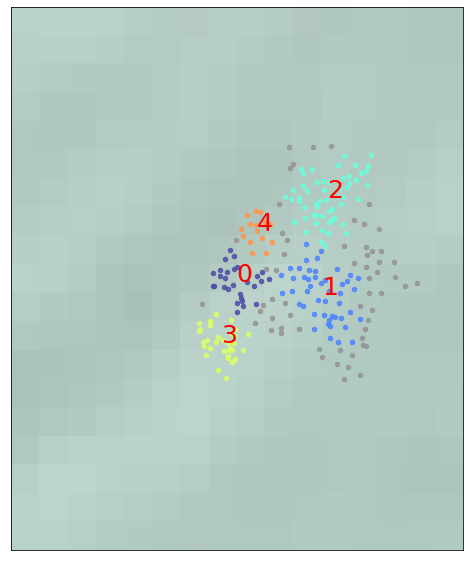

In [35]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc', lat_0 = latitude, lon_0 = longitude,
                 resolution = 'l', area_thresh = 0.1,
                 llcrnrlon=-84.75, llcrnrlat=33.5,
                 urcrnrlon=-84.25, urcrnrlat=34)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf_location2[pdf_location2.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        total = 0
        count = 0
        for hood in clust_set['Neighborhood']:
            #print(hood)
            x=num_crimes.Neighborhood[num_crimes.Neighborhood==hood].index.tolist()
            x1=x[0]
            total += num_crimes['Count'][x1]
            count += 1
        
        print ("Cluster "+str(clust_number)+', Avg Number of Crimes per Neighborhood: '+\
               str(total/count))

#### Viaualization based on violent crimes (assault and homocide).

In [39]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = df_crime_grouped[['HOMICIDE','AGG ASSAULT', 'Lat', 'Long']] #'Lat', 'Long',
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
#E = np.arange(.01, 2.5, .001)
n_list = []
#count=.01
#for e in E:
    
db = DBSCAN(eps=.492, min_samples=3).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf_loc = pdf
pdf_loc["Clus_Db"]=labels
    
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))
    
    
    
n=set(labels)
n_list.append(len(n))
    
    #trials = pd.DataFrame(pdf_loc['Clus_Db'].value_counts())
    #trials = trials.reset_index()
    #i_list = trials['index'].tolist()
    #clus_list = trials['index'].tolist()
    #if trials['index'][0] != -1 and len(i_list)>3:
    #    #if min(clus_list)==
    #    print(count)
    #    print(set(labels))
    #    print(trials.head())
    #count+=.001
    



# A sample of clusters
#pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)
pdf_loc.head()

,Neighborhood,AGG ASSAULT,AUTO THEFT,BURGLARY-NONRES,BURGLARY-RESIDENCE,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,MANSLAUGHTER,ROBBERY-COMMERCIAL,ROBBERY-PEDESTRIAN,ROBBERY-RESIDENCE,Lat,Long,Clus_Db
0,Adair Park,0.089820,0.173653,0.035928,0.047904,0.011976,0.323353,0.293413,0.0,0.011976,0.005988,0.005988,33.730347,-84.410063,-1
1,Adams Park,0.157895,0.092105,0.144737,0.105263,0.013158,0.197368,0.223684,0.0,0.013158,0.052632,0.000000,33.714388,-84.460742,-1
2,Adamsville,0.105072,0.137681,0.036232,0.043478,0.014493,0.246377,0.318841,0.0,0.007246,0.079710,0.010870,33.759221,-84.503375,-1
3,Almond Park,0.256410,0.051282,0.000000,0.179487,0.025641,0.179487,0.179487,0.0,0.000000,0.128205,0.000000,33.783793,-84.460715,-1
4,Amal Heights,0.384615,0.076923,0.000000,0.000000,0.000000,0.538462,0.000000,0.0,0.000000,0.000000,0.000000,33.708652,-84.398886,-1


In [40]:
set(labels)
pdf_location4 = pdf_location
pdf_location4['Clus_Db']=pdf_loc['Clus_Db']
pdf_location4.head()

,Neighborhood,AGG ASSAULT,AUTO THEFT,BURGLARY-NONRES,BURGLARY-RESIDENCE,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,MANSLAUGHTER,ROBBERY-COMMERCIAL,ROBBERY-PEDESTRIAN,ROBBERY-RESIDENCE,Lat,Long,xm,ym,Clus_Db
0,Adair Park,0.089820,0.173653,0.035928,0.047904,0.011976,0.323353,0.293413,0.0,0.011976,0.005988,0.005988,33.730347,-84.410063,37799.292596,30756.738273,-1
1,Adams Park,0.157895,0.092105,0.144737,0.105263,0.013158,0.197368,0.223684,0.0,0.013158,0.052632,0.000000,33.714388,-84.460742,32163.995241,28623.174719,-1
2,Adamsville,0.105072,0.137681,0.036232,0.043478,0.014493,0.246377,0.318841,0.0,0.007246,0.079710,0.010870,33.759221,-84.503375,27423.476158,34617.956266,-1
3,Almond Park,0.256410,0.051282,0.000000,0.179487,0.025641,0.179487,0.179487,0.0,0.000000,0.128205,0.000000,33.783793,-84.460715,32166.994952,37904.870592,-1
4,Amal Heights,0.384615,0.076923,0.000000,0.000000,0.000000,0.538462,0.000000,0.0,0.000000,0.000000,0.000000,33.708652,-84.398886,39042.059983,27856.481691,-1


Cluster 0, Avg Number of Homicide/Agg Assault Crimes per Neighborhood: 128.88793103448276
Cluster 1, Avg Number of Homicide/Agg Assault Crimes per Neighborhood: 7.142857142857143
Cluster 2, Avg Number of Homicide/Agg Assault Crimes per Neighborhood: 15.166666666666666
Cluster 3, Avg Number of Homicide/Agg Assault Crimes per Neighborhood: 6.666666666666667
Cluster 4, Avg Number of Homicide/Agg Assault Crimes per Neighborhood: 151.0
Cluster 5, Avg Number of Homicide/Agg Assault Crimes per Neighborhood: 154.0
Cluster 6, Avg Number of Homicide/Agg Assault Crimes per Neighborhood: 218.66666666666666


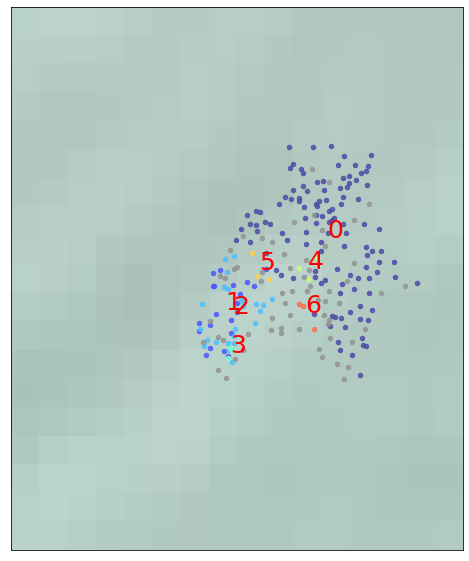

In [41]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc', lat_0 = latitude, lon_0 = longitude,
                 resolution = 'l', area_thresh = 0.1,
                 llcrnrlon=-84.75, llcrnrlat=33.5,
                 urcrnrlon=-84.25, urcrnrlat=34)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf_location4[pdf_location4.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        total = 0
        count = 0
        for hood in clust_set['Neighborhood']:
            #print(hood)
            x=num_crimes.Neighborhood[num_crimes.Neighborhood==hood].index.tolist()
            x1=x[0]
            total += num_crimes['Count'][x1]
            count += 1
        
        print ("Cluster "+str(clust_number)+', Avg Number of Homicide/Agg Assault Crimes per Neighborhood: '+\
               str(total/count))

#### Visualization based on robberies and location.

In [42]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = df_crime_grouped[['ROBBERY-COMMERCIAL','ROBBERY-PEDESTRIAN',\
                                      'ROBBERY-RESIDENCE', 'Lat', 'Long']] #'Lat', 'Long',
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
#E = np.arange(.01, 2.5, .001)
n_list = []
#count=.01
#for e in E:
    
db = DBSCAN(eps=.573, min_samples=3).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf_loc = pdf
pdf_loc["Clus_Db"]=labels
    
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))
    
    
    
n=set(labels)
n_list.append(len(n))
    
    #trials = pd.DataFrame(pdf_loc['Clus_Db'].value_counts())
    #trials = trials.reset_index()
    #i_list = trials['index'].tolist()
    #clus_list = trials['index'].tolist()
    #if trials['index'][0] != -1 and len(i_list)>3:
    #    #if min(clus_list)==
    #    print(count)
    #    print(set(labels))
    #    print(trials.head())
    #count+=.001
    



# A sample of clusters
#pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)
pdf_loc.head()

,Neighborhood,AGG ASSAULT,AUTO THEFT,BURGLARY-NONRES,BURGLARY-RESIDENCE,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,MANSLAUGHTER,ROBBERY-COMMERCIAL,ROBBERY-PEDESTRIAN,ROBBERY-RESIDENCE,Lat,Long,Clus_Db
0,Adair Park,0.089820,0.173653,0.035928,0.047904,0.011976,0.323353,0.293413,0.0,0.011976,0.005988,0.005988,33.730347,-84.410063,1
1,Adams Park,0.157895,0.092105,0.144737,0.105263,0.013158,0.197368,0.223684,0.0,0.013158,0.052632,0.000000,33.714388,-84.460742,3
2,Adamsville,0.105072,0.137681,0.036232,0.043478,0.014493,0.246377,0.318841,0.0,0.007246,0.079710,0.010870,33.759221,-84.503375,-1
3,Almond Park,0.256410,0.051282,0.000000,0.179487,0.025641,0.179487,0.179487,0.0,0.000000,0.128205,0.000000,33.783793,-84.460715,-1
4,Amal Heights,0.384615,0.076923,0.000000,0.000000,0.000000,0.538462,0.000000,0.0,0.000000,0.000000,0.000000,33.708652,-84.398886,0


In [43]:
pdf_location5 = pdf_location
pdf_location5['Clus_Db']=pdf_loc['Clus_Db']
pdf_location5.head()

,Neighborhood,AGG ASSAULT,AUTO THEFT,BURGLARY-NONRES,BURGLARY-RESIDENCE,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,MANSLAUGHTER,ROBBERY-COMMERCIAL,ROBBERY-PEDESTRIAN,ROBBERY-RESIDENCE,Lat,Long,xm,ym,Clus_Db
0,Adair Park,0.089820,0.173653,0.035928,0.047904,0.011976,0.323353,0.293413,0.0,0.011976,0.005988,0.005988,33.730347,-84.410063,37799.292596,30756.738273,1
1,Adams Park,0.157895,0.092105,0.144737,0.105263,0.013158,0.197368,0.223684,0.0,0.013158,0.052632,0.000000,33.714388,-84.460742,32163.995241,28623.174719,3
2,Adamsville,0.105072,0.137681,0.036232,0.043478,0.014493,0.246377,0.318841,0.0,0.007246,0.079710,0.010870,33.759221,-84.503375,27423.476158,34617.956266,-1
3,Almond Park,0.256410,0.051282,0.000000,0.179487,0.025641,0.179487,0.179487,0.0,0.000000,0.128205,0.000000,33.783793,-84.460715,32166.994952,37904.870592,-1
4,Amal Heights,0.384615,0.076923,0.000000,0.000000,0.000000,0.538462,0.000000,0.0,0.000000,0.000000,0.000000,33.708652,-84.398886,39042.059983,27856.481691,0


Cluster 0, Avg Number of Robbery Crimes per Neighborhood: 78.6923076923077
Cluster 1, Avg Number of Robbery Crimes per Neighborhood: 204.5
Cluster 2, Avg Number of Robbery Crimes per Neighborhood: 25.0
Cluster 3, Avg Number of Robbery Crimes per Neighborhood: 133.66666666666666
Cluster 4, Avg Number of Robbery Crimes per Neighborhood: 290.3333333333333
Cluster 5, Avg Number of Robbery Crimes per Neighborhood: 56.75
Cluster 6, Avg Number of Robbery Crimes per Neighborhood: 237.0
Cluster 7, Avg Number of Robbery Crimes per Neighborhood: 17.333333333333332


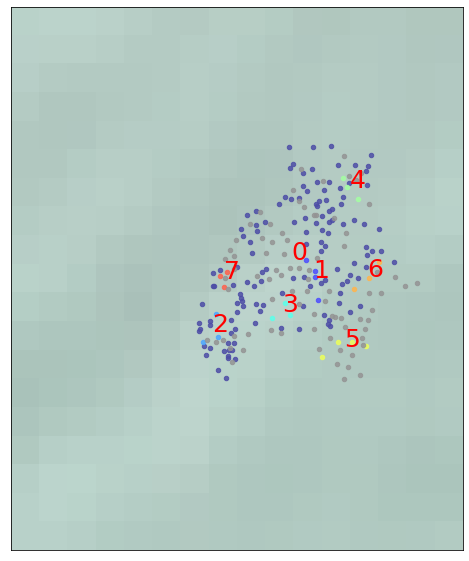

In [44]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc', lat_0 = latitude, lon_0 = longitude,
                 resolution = 'l', area_thresh = 0.1,
                 llcrnrlon=-84.75, llcrnrlat=33.5,
                 urcrnrlon=-84.25, urcrnrlat=34)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf_location5[pdf_location5.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        total = 0
        count = 0
        for hood in clust_set['Neighborhood']:
            #print(hood)
            x=num_crimes.Neighborhood[num_crimes.Neighborhood==hood].index.tolist()
            x1=x[0]
            total += num_crimes['Count'][x1]
            count += 1
        
        print ("Cluster "+str(clust_number)+', Avg Number of Robbery Crimes per Neighborhood: '+\
               str(total/count))

#### NPU's with most crime.

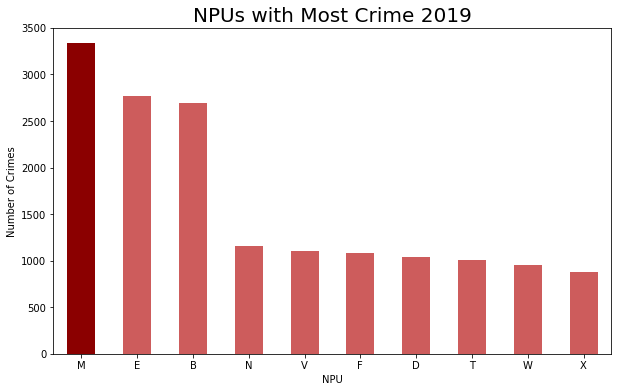

In [46]:
hood_crime = df_crime['NPU'].value_counts()
hood_crime10 = hood_crime[0:10]

top_10 = hood_crime10.plot(kind='bar', color = 'indianred', figsize=(10, 6))
top_10.patches[hood_crime10.index.get_indexer(['M'])[0]].set_facecolor('darkred')

plt.xlabel('NPU') 
plt.ylabel('Number of Crimes') 
plt.title('NPUs with Most Crime 2019', fontsize=20)
plt.xticks(rotation=0)

plt.show()

#### The neighborhoods that consist of the highest number of crimes, which are in NPU: M are: Castleberry Hill, Downtown, Old Fourth Ward, Sweet Auburn. Now let's look at the common crimes.

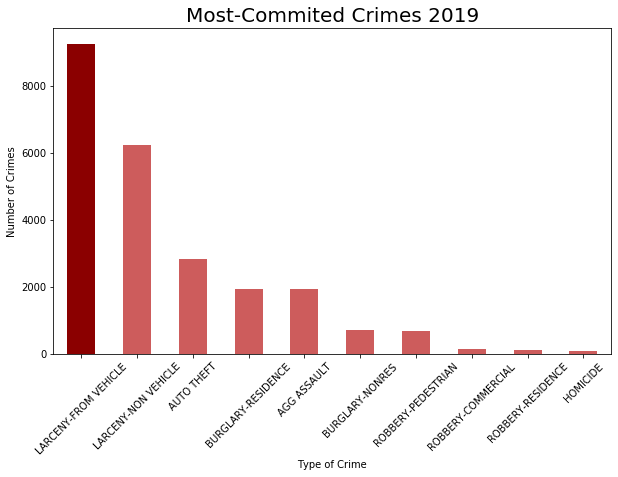

In [55]:
hood_crime = df_crime['Crime'].value_counts()
hood_crime10 = hood_crime[0:10]

top_10 = hood_crime10.plot(kind='bar', color = 'indianred', figsize=(10, 6))
top_10.patches[hood_crime10.index.get_indexer(['LARCENY-FROM VEHICLE'])[0]].set_facecolor('darkred')

plt.xlabel('Type of Crime') 
plt.ylabel('Number of Crimes') 
plt.title('Most-Commited Crimes 2019', fontsize=20) 
plt.xticks(rotation=45)
               
plt.show()

In [52]:
# Violent Crimes as available by Atlanta PD dataset

homicide = df_crime.query('Crime == "HOMICIDE"')
agg_assault = df_crime.query('Crime == "AGG ASSAULT"')
rob_ped = df_crime.query('Crime == "ROBBERY-PEDESTRIAN"')
rob_com = df_crime.query('Crime == "ROBBERY-COMMERCIAL"')
rob_res = df_crime.query('Crime == "ROBBERY-RESIDENCE"')

frames = [homicide, agg_assault, rob_ped, rob_com, rob_res]
violent_crimes = pd.concat(frames, sort=False)

violent_crimes = violent_crimes.reset_index()
violent_crimes.drop('index', axis=1, inplace = True)
print(violent_crimes.shape)
violent_crimes.head()

(3001, 6)


,Crime,Report Date,Neighborhood,NPU,Lat,Long
0,HOMICIDE,01/19/2019,Downtown,M,33.76614,-84.38760
1,HOMICIDE,01/14/2019,English Avenue,L,33.77085,-84.40554
2,HOMICIDE,01/12/2019,Florida Heights,I,33.75183,-84.46623
3,HOMICIDE,01/10/2019,Old Fourth Ward,M,33.76998,-84.37408
4,HOMICIDE,01/10/2019,Grove Park,J,33.77676,-84.45342


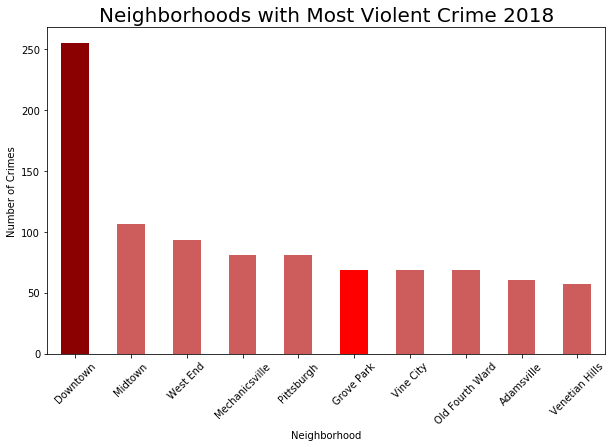

In [53]:
hood_crime = violent_crimes['Neighborhood'].value_counts()
hood_crime10 = hood_crime[0:10]

top_10 = hood_crime10.plot(kind='bar', color = 'indianred',figsize=(10, 6))
top_10.patches[hood_crime10.index.get_indexer(['Downtown'])[0]].set_facecolor('darkred')
top_10.patches[hood_crime10.index.get_indexer(['Grove Park'])[0]].set_facecolor('red')

plt.xlabel('Neighborhood') 
plt.ylabel('Number of Crimes')
plt.title('Neighborhoods with Most Violent Crime 2018', fontsize = 20)
plt.xticks(rotation=45)

plt.show()

### Location data
#### Clustering Venue Data and Data Exploration (Independent of Crime Clusters)

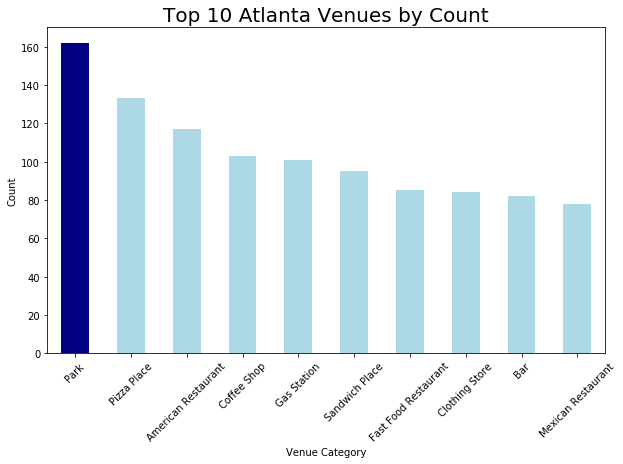

In [54]:
venue_counts = atlanta_venues['Venue Category'].value_counts()
venue_counts10 = venue_counts[0:10]


top_10 = venue_counts10.plot(kind='bar', color = 'lightblue', figsize=(10, 6))
top_10.patches[venue_counts10.index.get_indexer(['Park'])[0]].set_facecolor('navy')

plt.xlabel('Venue Category') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Top 10 Atlanta Venues by Count', fontsize=20) # add title to the plot
plt.xticks(rotation=45)
               
plt.show()

#### Let's calculate how many venues are in each neighborhood.

In [56]:
atlanta_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adair Park,13,13,13,13,13,13
Adams Park,4,4,4,4,4,4
Adamsville,15,15,15,15,15,15
Almond Park,4,4,4,4,4,4
Amal Heights,5,5,5,5,5,5
Ansley Park,51,51,51,51,51,51
Arden/Habersham,2,2,2,2,2,2
Ardmore,45,45,45,45,45,45
Argonne Forest,4,4,4,4,4,4


In [57]:
print('There are {} uniques categories.'.format(len(atlanta_venues['Venue Category'].unique())))

There are 345 uniques categories.


In [58]:
# one hot encoding
atl_venues_onehot = pd.get_dummies(atlanta_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
atl_venues_onehot['Neighborhood'] = atlanta_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [atl_venues_onehot.columns[-1]] + list(atl_venues_onehot.columns[:-1])
atl_venues_onehot = atl_venues_onehot[fixed_columns]

atl_venues_onehot.head()

,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,Adult Education Center,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,...,Volleyball Court,Warehouse Store,Waste Facility,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [59]:
atl_venues_grouped = atl_venues_onehot.groupby('Neighborhood').mean().reset_index()
atl_venues_grouped.head()

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,Adult Education Center,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,...,Volleyball Court,Warehouse Store,Waste Facility,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Adair Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0
1,Adams Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,Adamsville,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,Almond Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,Amal Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [60]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [61]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
atlanta_venues_sorted = pd.DataFrame(columns=columns)
atlanta_venues_sorted['Neighborhood'] = atl_venues_grouped['Neighborhood']

for ind in np.arange(atl_venues_grouped.shape[0]):
    atlanta_venues_sorted.iloc[ind, 1:] = return_most_common_venues(atl_venues_grouped.iloc[ind, :], num_top_venues)

atlanta_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adair Park,Trail,Real Estate Office,Health & Beauty Service,Park,Beer Store,Event Space,Art Gallery,Gastropub,Wine Bar,Historic Site
1,Adams Park,Golf Course,Park,Sandwich Place,Business Service,Exhibit,Elementary School,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service
2,Adamsville,Fried Chicken Joint,Discount Store,Food,Fast Food Restaurant,Chinese Restaurant,Seafood Restaurant,Gas Station,Roller Rink,Liquor Store,Ethiopian Restaurant
3,Almond Park,Park,Auto Workshop,Bar,Convenience Store,Falafel Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space
4,Amal Heights,Non-Profit,Trail,Music Venue,Bar,Chinese Restaurant,Eye Doctor,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service


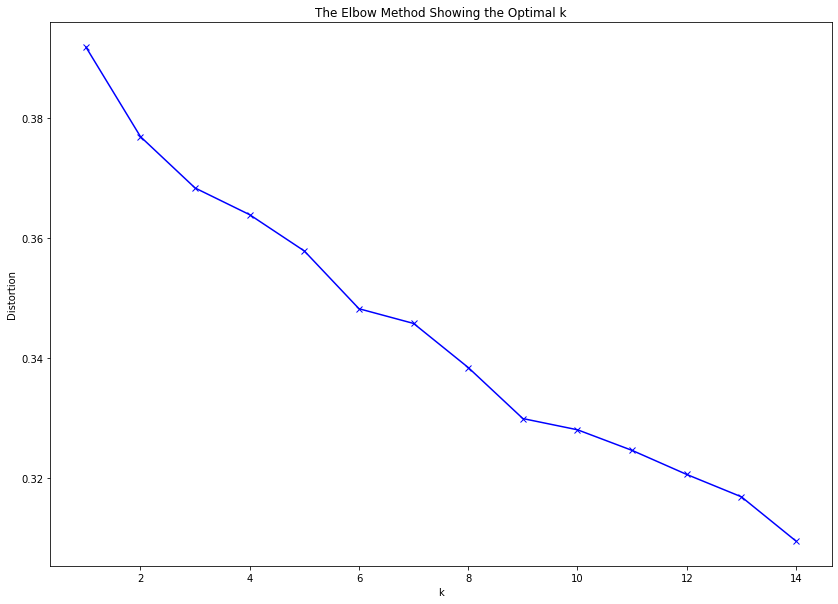

In [62]:
from sklearn.cluster import KMeans

# k means determine k
atl_venues_clustering = atl_venues_grouped.drop('Neighborhood', 1)
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=4).fit(atl_venues_clustering)
    kmeanModel.fit(atl_venues_clustering)
    distortions.append(sum(np.min(cdist(atl_venues_clustering,\
                                        kmeanModel.cluster_centers_, 'euclidean'),\
                                        axis=1)) / atl_venues_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing the Optimal k')
plt.show()

In [63]:
# set number of clusters
kclusters = 9

atlanta_venues_clustering = atl_venues_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(atlanta_venues_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ #[0:10]

array([4, 6, 4, 6, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 4, 6, 4, 4, 4, 2, 6, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 6, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4,
       4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 6, 6, 4, 6, 0, 4, 4, 4, 4, 6, 4, 4,
       4, 3, 6, 8, 8, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 5, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 5, 0, 4, 4, 0,
       4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 6, 4, 4, 4, 6, 4, 4, 4, 1, 1,
       4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 0, 5, 4, 2, 4, 4, 4, 4, 4, 4, 5, 7, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4,
       4, 3, 4, 4, 4, 6, 6, 4, 8, 4, 4, 6, 4, 4], dtype=int32)

In [64]:
#atlanta_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
print(atlanta_venues_sorted.shape)
print(df_coord.shape)
set1 = set(atlanta_venues_sorted['Neighborhood'].to_list())
set2 = set(df_coord['Neighborhood'].to_list())
print(set2.difference(set1))
#atlanta_venues_sorted.head()

(234, 11)
(235, 4)
{'Paces'}


In [66]:
# add clustering labels
atlanta_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

atl_merged2 = df_coord
atl_merged2.drop([163,228], inplace=True)

# merge atl_grouped with toronto_data to add latitude/longitude for each neighborhood
atl_merged2 = atl_merged2.join(atlanta_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
print(atl_merged2.shape)
atl_merged2.head()

(233, 15)


,Neighborhood,NPU,Lat,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adair Park,V,33.730347,-84.410063,4,Trail,Real Estate Office,Health & Beauty Service,Park,Beer Store,Event Space,Art Gallery,Gastropub,Wine Bar,Historic Site
1,Adams Park,R,33.714388,-84.460742,6,Golf Course,Park,Sandwich Place,Business Service,Exhibit,Elementary School,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service
2,Adamsville,H,33.759221,-84.503375,4,Fried Chicken Joint,Discount Store,Food,Fast Food Restaurant,Chinese Restaurant,Seafood Restaurant,Gas Station,Roller Rink,Liquor Store,Ethiopian Restaurant
3,Almond Park,G,33.783793,-84.460715,6,Park,Auto Workshop,Bar,Convenience Store,Falafel Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space
4,Amal Heights,Y,33.708652,-84.398886,4,Non-Profit,Trail,Music Venue,Bar,Chinese Restaurant,Eye Doctor,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service


In [68]:
# create map

import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(atl_merged2['Lat'], atl_merged2['Long'], atl_merged2['Neighborhood'], atl_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### DBSCAN Clustering Based on Venues

In [69]:
pdf_venue = atl_venues_grouped
pdf_venue['Lat'] = atl_merged2['Lat']
pdf_venue['Long'] = atl_merged2['Long']
#pdf_venue.drop(['Clus_Db'], axis=1, inplace=True)
print(pdf_venue.shape)
pdf_venue.head(5)

(234, 347)


,Neighborhood,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,Adult Education Center,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,...,Waste Facility,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Lat,Long
0,Adair Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,33.730347,-84.410063
1,Adams Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,33.714388,-84.460742
2,Adamsville,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,33.759221,-84.503375
3,Almond Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,33.783793,-84.460715
4,Amal Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,33.708652,-84.398886


In [70]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = atl_venues_grouped[['Bar', 'Convenience Store', 'Liquor Store']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
#E = np.arange(.2, .5, .001)
n_list = []
#count=.2
#for e in E:
    
db = DBSCAN(eps=.255, min_samples=4).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf_loc = pdf_venue
pdf_loc["Clus_Db"]=labels+1
    
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))
    
    
    
n=set(labels)
n_list.append(len(n))
    
    #trials = pd.DataFrame(pdf_loc['Clus_Db'].value_counts())
    #trials = trials.reset_index()
    #i_list = trials['index'].tolist()
    #clus_list = trials['index'].tolist()
    #if trials['index'][0] != -1 and len(i_list)>2:
    #    #if min(clus_list)==
    #    print(count)
    #    print(trials.head())
    #count+=.001
    



# A sample of clusters
#pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)
pdf_loc.head()

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,Adult Education Center,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Lat,Long,Clus_Db
0,Adair Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,33.730347,-84.410063,1
1,Adams Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,33.714388,-84.460742,1
2,Adamsville,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,33.759221,-84.503375,5
3,Almond Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,33.783793,-84.460715,0
4,Amal Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,33.708652,-84.398886,0


In [71]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

kclusters = 8
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(atl_merged2['Lat'], atl_merged2['Long'], atl_merged2['Neighborhood'], pdf_loc['Clus_Db']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [75]:
venue_clus0 = atl_merged2.loc[atl_merged2['Cluster Labels'] == 0, atl_merged2.columns[[0] + list(range(5, atl_merged2.shape[1]))]]
venue_clus1 = atl_merged2.loc[atl_merged2['Cluster Labels'] == 1, atl_merged2.columns[[0] + list(range(5, atl_merged2.shape[1]))]]
venue_clus2 = atl_merged2.loc[atl_merged2['Cluster Labels'] == 2, atl_merged2.columns[[0] + list(range(5, atl_merged2.shape[1]))]]
venue_clus3 = atl_merged2.loc[atl_merged2['Cluster Labels'] == 3, atl_merged2.columns[[0] + list(range(5, atl_merged2.shape[1]))]]
venue_clus4 = atl_merged2.loc[atl_merged2['Cluster Labels'] == 4, atl_merged2.columns[[0] + list(range(5, atl_merged2.shape[1]))]]
venue_clus5 = atl_merged2.loc[atl_merged2['Cluster Labels'] == 5, atl_merged2.columns[[0] + list(range(5, atl_merged2.shape[1]))]]
venue_clus6 = atl_merged2.loc[atl_merged2['Cluster Labels'] == 6, atl_merged2.columns[[0] + list(range(5, atl_merged2.shape[1]))]]
venue_clus7 = atl_merged2.loc[atl_merged2['Cluster Labels'] == 7, atl_merged2.columns[[0] + list(range(5, atl_merged2.shape[1]))]]


## Results

#### Determining Venue Breakdown in Neighborhoods based on Crime Clusters

#### Using the clusters formed from the crime data, we will see if the frequency of alchohol and/or weapon outlets is higher where the average occurence of crimes/a crime is higher.

In [76]:
#atl_venues_grouped.drop(['Clus_Db'], axis=1, inplace=True)
dbmeans1 = atl_venues_grouped.copy()
dbmeans1['Cluster Labels'] = pdf_location2['Clus_Db']
dbmeans1.head()

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,Adult Education Center,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,...,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Lat,Long,Clus_Db,Cluster Labels
0,Adair Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.076923,0.0,0.0,0.0,0.0,33.730347,-84.410063,1,1
1,Adams Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,33.714388,-84.460742,1,3
2,Adamsville,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,33.759221,-84.503375,5,-1
3,Almond Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,33.783793,-84.460715,0,-1
4,Amal Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,33.708652,-84.398886,0,0


In [77]:
dbmeansum1 = dbmeans1.groupby('Cluster Labels').mean().reset_index()
dbmeansum1[['Cluster Labels', 'Bar', 'Liquor Store', 'Convenience Store', 'Gun Shop', 'Pawn Shop']]

,Cluster Labels,Bar,Liquor Store,Convenience Store,Gun Shop,Pawn Shop
0,-1,0.011516,0.012025,0.026096,0.000000,0.003388
1,0,0.012623,0.009673,0.008284,0.000214,0.000287
2,1,0.034375,0.031250,0.093750,0.031250,0.000000
3,2,0.000000,0.037037,0.000000,0.000000,0.000000
4,3,0.000000,0.000000,0.000000,0.000000,0.000000
5,4,0.007963,0.033333,0.004630,0.000000,0.000000
6,5,0.011029,0.011364,0.000000,0.000000,0.000000
7,6,0.013889,0.000000,0.000000,0.000000,0.000000
8,7,0.000000,0.025641,0.000000,0.000000,0.000000


In [78]:
x = [1.0,2.0,3.0,4.0,5.0,6.0]
y = [4.0, 1.75, 3.5, 1.0, 3.0, 3.5]
df_overall = pd.DataFrame(y,x).reset_index()
df_overall.columns=['Rank','Score']
x_labels = ['Clus 5', 'Clus 1', 'Clus 2', 'Clus 4', 'Clus 3', 'Clus 0']
df_overall.head()

,Rank,Score
0,1.0,4.00
1,2.0,1.75
2,3.0,3.50
3,4.0,1.00
4,5.0,3.00


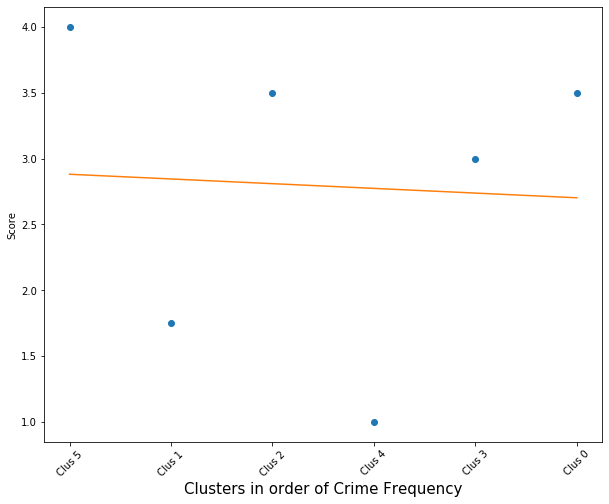

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from scipy import stats

plt.figure(figsize=(10,8))

xi = np.arange(0,6)
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

#plt.scatter(x, y, c='r', alpha=0.5)
plt.plot(xi,y,'o', xi, line)
plt.xticks(range(6), x_labels, rotation=45, fontsize='10')
plt.xlabel('Clusters in order of Crime Frequency', fontsize='15')
plt.ylabel('Score')
plt.show()

In [81]:
dbmeans3 = atl_venues_grouped.copy()
dbmeans3['Cluster Labels'] = pdf_location4['Clus_Db']
dbmeans3.head()

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,Adult Education Center,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,...,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Lat,Long,Clus_Db,Cluster Labels
0,Adair Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.076923,0.0,0.0,0.0,0.0,33.730347,-84.410063,1,1
1,Adams Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,33.714388,-84.460742,1,3
2,Adamsville,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,33.759221,-84.503375,5,-1
3,Almond Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,33.783793,-84.460715,0,-1
4,Amal Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,33.708652,-84.398886,0,0


In [82]:
dbmeansum3 = dbmeans3.groupby('Cluster Labels').mean().reset_index()
dbmeansum3[['Cluster Labels', 'Bar', 'Liquor Store', 'Convenience Store', 'Gun Shop', 'Pawn Shop']]

,Cluster Labels,Bar,Liquor Store,Convenience Store,Gun Shop,Pawn Shop
0,-1,0.011516,0.012025,0.026096,0.000000,0.003388
1,0,0.012623,0.009673,0.008284,0.000214,0.000287
2,1,0.034375,0.031250,0.093750,0.031250,0.000000
3,2,0.000000,0.037037,0.000000,0.000000,0.000000
4,3,0.000000,0.000000,0.000000,0.000000,0.000000
5,4,0.007963,0.033333,0.004630,0.000000,0.000000
6,5,0.011029,0.011364,0.000000,0.000000,0.000000
7,6,0.013889,0.000000,0.000000,0.000000,0.000000
8,7,0.000000,0.025641,0.000000,0.000000,0.000000


In [83]:
x = [1.0,2.0,3.0,4.0,5.0]
y = [2.0, 1.0, 1.0, 2.75, 2.33]
df_violent = pd.DataFrame(y,x).reset_index()
df_violent.columns=['Rank','Score']
x_labels = ['Clus 4', 'Clus 6', 'Clus 5', 'Clus 2', 'Clus 0']
df_violent.head()

,Rank,Score
0,1.0,2.00
1,2.0,1.00
2,3.0,1.00
3,4.0,2.75
4,5.0,2.33


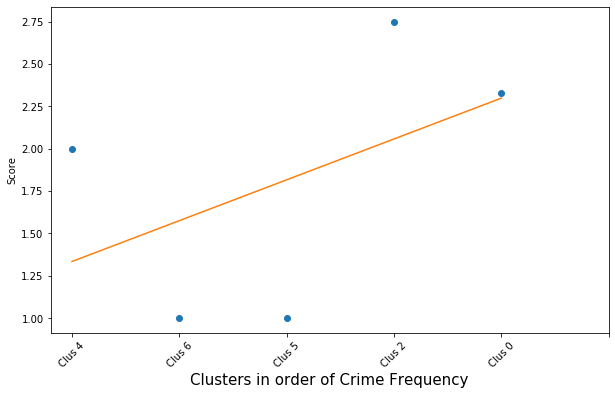

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from scipy import stats

plt.figure(figsize=(10,6))

xi = np.arange(0,5)
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

#plt.scatter(x, y, c='r', alpha=0.5)
plt.plot(xi,y,'o', xi, line)
plt.xticks(range(6), x_labels, rotation=45, fontsize='10')
plt.xlabel('Clusters in order of Crime Frequency', fontsize='15')
plt.ylabel('Score')
plt.show()

In [85]:
dbmeans4 = atl_venues_grouped.copy()
dbmeans4['Cluster Labels'] = pdf_location5['Clus_Db']
dbmeansum4 = dbmeans4.groupby('Cluster Labels').mean().reset_index()
dbmeansum4[['Cluster Labels', 'Bar', 'Liquor Store', 'Convenience Store', 'Gun Shop', 'Pawn Shop']]

,Cluster Labels,Bar,Liquor Store,Convenience Store,Gun Shop,Pawn Shop
0,-1,0.011516,0.012025,0.026096,0.000000,0.003388
1,0,0.012623,0.009673,0.008284,0.000214,0.000287
2,1,0.034375,0.031250,0.093750,0.031250,0.000000
3,2,0.000000,0.037037,0.000000,0.000000,0.000000
4,3,0.000000,0.000000,0.000000,0.000000,0.000000
5,4,0.007963,0.033333,0.004630,0.000000,0.000000
6,5,0.011029,0.011364,0.000000,0.000000,0.000000
7,6,0.013889,0.000000,0.000000,0.000000,0.000000
8,7,0.000000,0.025641,0.000000,0.000000,0.000000


In [86]:
x = [1.0,2.0,3.0,4.0,5.0,6.0]
y = [1.5, 2.0, 4.0, 5.0, 2.0,3.33]
df_robb = pd.DataFrame(y,x).reset_index()
df_robb.columns=['Rank','Score']
x_labels = ['Clus 2', 'Clus 6', 'Clus 1', 'Clus 5', 'Clus 3', 'Clus 4']
df_robb.head()

,Rank,Score
0,1.0,1.5
1,2.0,2.0
2,3.0,4.0
3,4.0,5.0
4,5.0,2.0


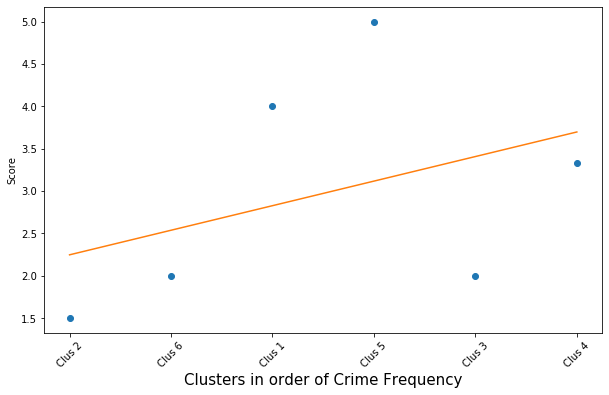

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from scipy import stats

plt.figure(figsize=(10,6))

xi = np.arange(0,6)
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

#plt.scatter(x, y, c='r', alpha=0.5)
plt.plot(xi,y,'o', xi, line)
plt.xticks(range(6), x_labels, rotation=45, fontsize='10')
plt.xlabel('Clusters in order of Crime Frequency', fontsize='15')
plt.ylabel('Score')
plt.show()

### Discussion/Conclusion

One of my goals was to search for correlations between venues traditionally associated with crime to see if it applied to Atlanta. For example, neighborhoods with more bars, liquor stores, etc would be expected to have higher crime rates by this logic. It is also important to remember that cluster sizes vary, so there may be variables that contribute to crime rates in specific areas that are unaccounted for in my results.
Using the crime rank and average scores given to each cluster I determined the correlations. For example, cluster with highest frequency of a particular venue received a 1, lowest a 6, and the applicable scores were averaged across. Only where a frequency greater than 0 occurred was taken into consideration. For example, a cluster with only 3 venues applicable would take the average rank only for 3 venues, not 5.
Overall Crime(Location) Appears to be a negative correlation surprisingly. We would expect the score average to increase(meaning lower frequency of the targeted venues) by my hypothesis.
Agg Assualt/Homicide Crimes Although to a lesser extent than larceny crimes, there is still a clear positive relationship between the frequency of the targeted venues and the average crime per neighborhood in the clusters.
Robbery Crimes Yet again, there is a positive correlation between the frequency of the targeted venues and the average number of robbery crimes per neighborhood committed in 2019.
Conclusion
Based on these findings, I can conclude that there appears to be a positive correlation between the frequency alcohol-selling venues and crime(gun shops and pawn shops were included in finding the results but their mean freqency was usually 0 among clusters). There may be other variables at play that also contribute to crime, so it is not definitive that reducing alcohol-selling venues would guarantee a decrease in crime. However, it is something to keep in mind for various groups of people such as police officers, venue owners, citizens, and more.